In [137]:
!pip install numpy
!pip install pandas

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [195]:
data = pd.read_csv('/content/elephant.csv', encoding='latin-1')

In [196]:
data.head()

,name,year,month,weather changes,population,vegetation,location
0,agboo,2023.0,january,northeast-monsoon,734.0,53.0,614.0
1,agboo,2023.0,february,northeast-monsoon,932.0,61.0,615.0
2,agboo,2023.0,march,first inter-monsoon,1693.0,52.0,616.0
3,agboo,2023.0,april,first inter-monsoon,932.0,55.0,615.0
4,agboo,2023.0,may,southwest-monsoon,2363.0,85.0,612.0


In [197]:
data.describe()

,year,population,vegetation,location
count,2543.000000,2548.000000,2543.000000,2546.000000
mean,2016.546205,1395.407771,103.639796,625.313433
std,4.044419,807.645684,39.308350,12.688034
min,2010.000000,470.000000,52.000000,605.000000
25%,2013.000000,781.000000,67.000000,615.000000
50%,2017.000000,1264.000000,97.000000,623.000000
75%,2020.000000,1658.000000,139.500000,633.000000
max,2023.000000,3512.000000,178.000000,687.000000


In [198]:
def analzeData(data):
    print (data.shape)
    print (data.info)
    print (data.head())
    print(data.describe().transpose())

analzeData(data)

(2551, 7)
<bound method DataFrame.info of          name    year     month       weather changes  population  vegetation  \
0       agboo  2023.0   january     northeast-monsoon       734.0        53.0   
1       agboo  2023.0  february     northeast-monsoon       932.0        61.0   
2       agboo  2023.0     march   first inter-monsoon      1693.0        52.0   
3       agboo  2023.0     april   first inter-monsoon       932.0        55.0   
4       agboo  2023.0       may     southwest-monsoon      2363.0        85.0   
...       ...     ...       ...                   ...         ...         ...   
2546  rewatha  2020.0       NaN     southwest-monsoon      1309.0         NaN   
2547  rewatha  2020.0      july     southwest-monsoon      1658.0        68.0   
2548  rewatha     NaN    august     southwest-monsoon      1020.0       146.0   
2549  rewatha  2020.0       NaN                   NaN         NaN         NaN   
2550  rewatha     NaN   october  second inter-monsoon      1839.0  

In [199]:
data.isnull().sum()

name               1
year               8
month              6
weather changes    6
population         3
vegetation         8
location           5
dtype: int64

In [200]:
data = data.dropna()

In [201]:
data.isnull().sum()

name               0
year               0
month              0
weather changes    0
population         0
vegetation         0
location           0
dtype: int64

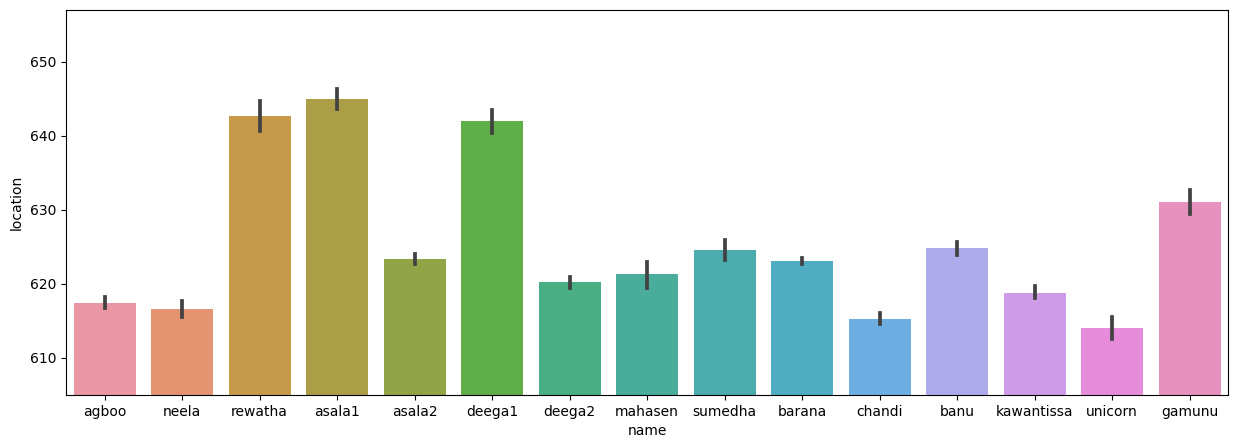

In [205]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='name', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

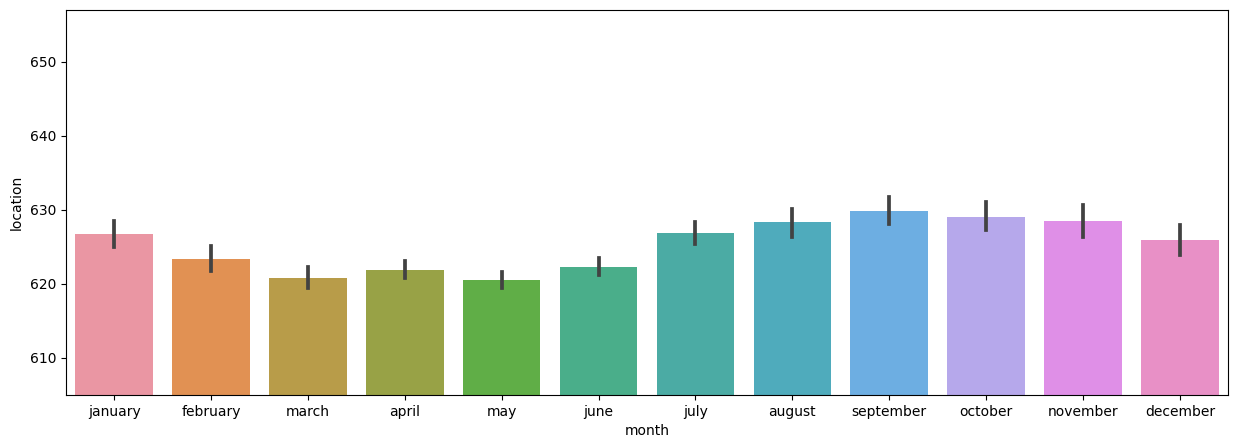

In [206]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='month', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

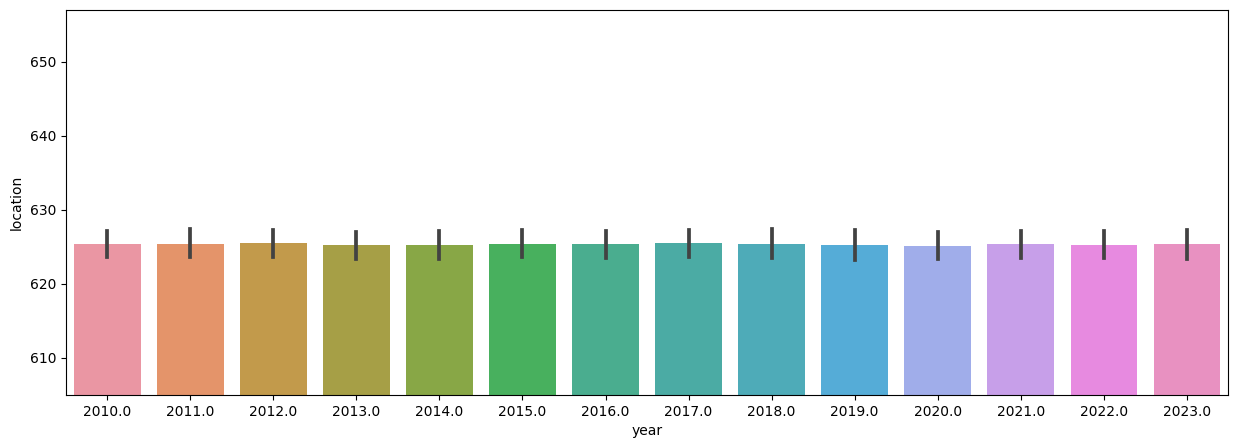

In [207]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='year', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

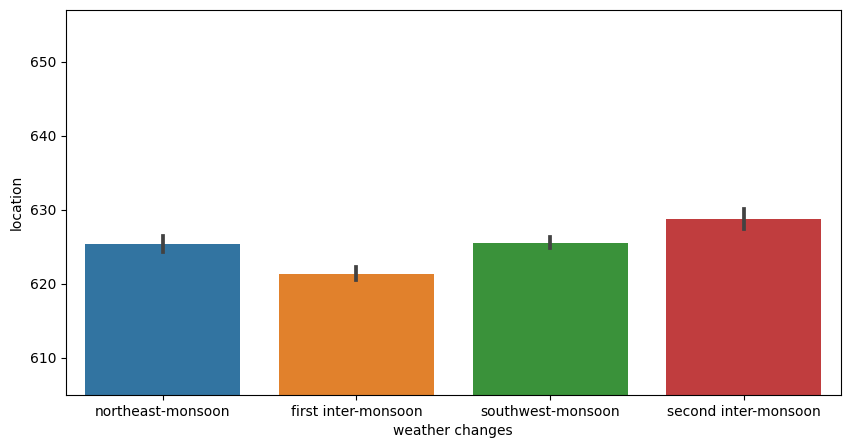

In [210]:
plot = plt.figure(figsize=(10,5))
sns.barplot(x='weather changes', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

In [211]:
data = data.drop(columns=['population', 'vegetation'])

In [212]:
data.head()

,name,year,month,weather changes,location
0,agboo,2023.0,january,northeast-monsoon,614.0
1,agboo,2023.0,february,northeast-monsoon,615.0
2,agboo,2023.0,march,first inter-monsoon,616.0
3,agboo,2023.0,april,first inter-monsoon,615.0
4,agboo,2023.0,may,southwest-monsoon,612.0


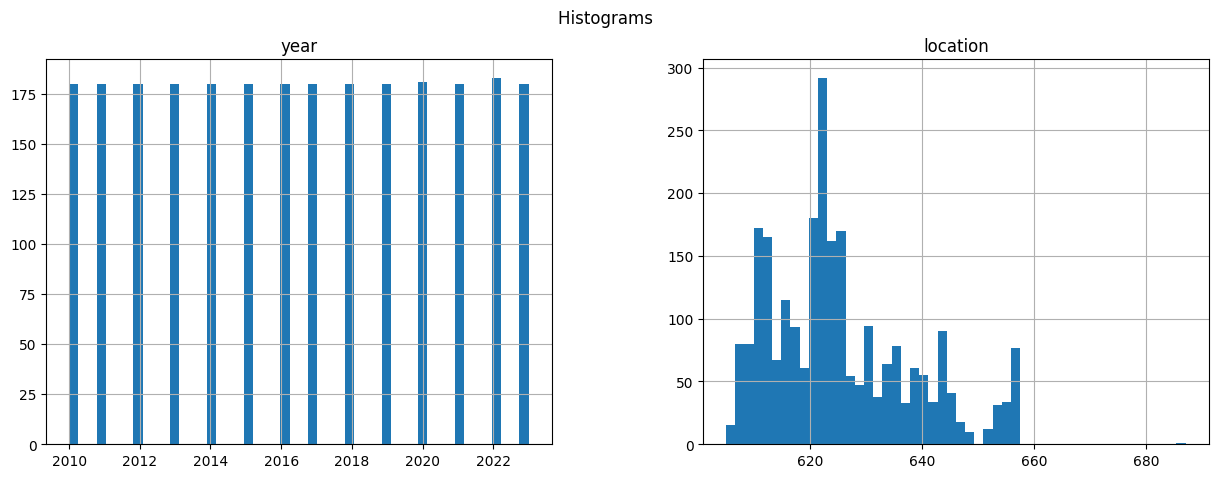

In [213]:
def visualize_data(data):

    # Histograms
    data.hist(bins=50, figsize=(15, 5))
    plt.suptitle("Histograms ")
    plt.show()

visualize_data(data)

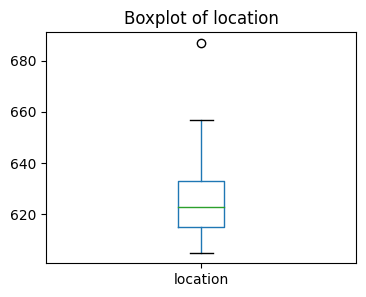

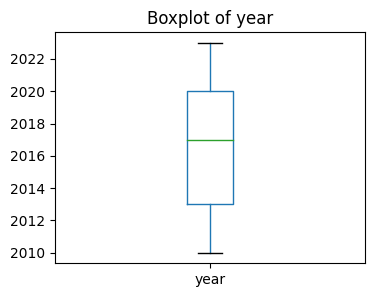

In [214]:
def plot_boxplot(df, ft, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.title(f"Boxplot of {ft}")
    plt.show()

plot_boxplot(data, "location", figsize=(4, 3))
plot_boxplot(data, "year", figsize=(4, 3))

In [215]:
def remove_outliers(data, column_name, threshold):
    """
    Remove outliers from a pandas dataframe based on a specified column and threshold.

    Parameters:
        df (pandas dataframe): The dataframe from which to remove outliers.
        column_name (str): The name of the column to check for outliers.
        threshold (float): The threshold for determining an outlier (e.g. 1.5 for 1.5 times the interquartile range).

    Returns:
        pandas dataframe: The dataframe with outliers removed.
    """
    # Calculate the column's mean and standard deviation
    mean = data[column_name].mean()
    std = data[column_name].std()

    # Calculate the lower and upper bounds for outliers
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Remove rows where the column value is outside the bounds
    data = data[(data[column_name] > lower_bound) & (data[column_name] < upper_bound)]

    return data


# Remove outliers from the 'AMOUNT " column a threshold of 1.5
data= remove_outliers(data, 'location', 1.5)

# Check the resulting dataframe
data.shape

(2285, 5)

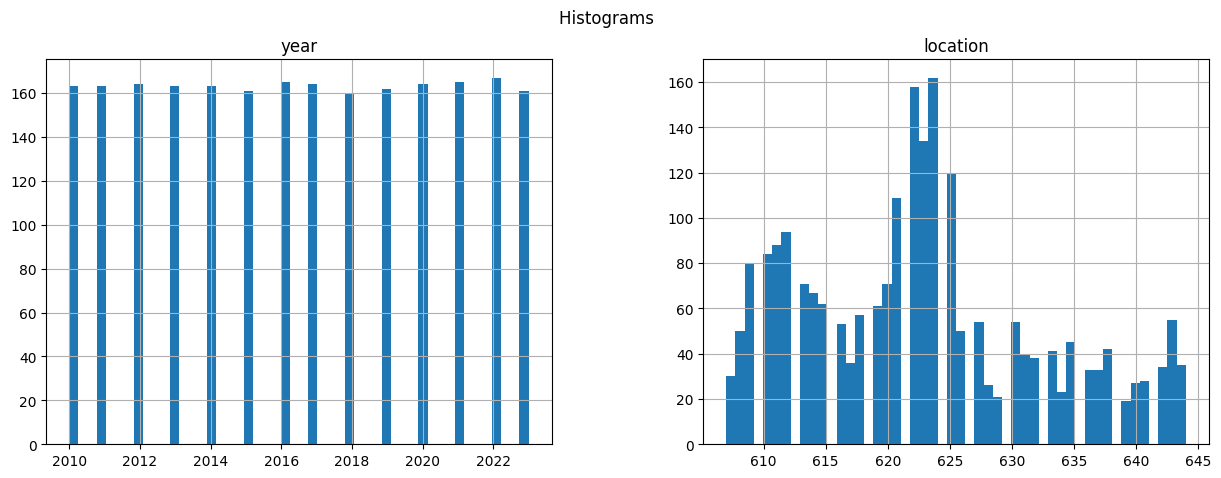

In [216]:
def visualize_data(data):

    # Histograms
    data.hist(bins=50, figsize=(15, 5))
    plt.suptitle("Histograms ")
    plt.show()

visualize_data(data)

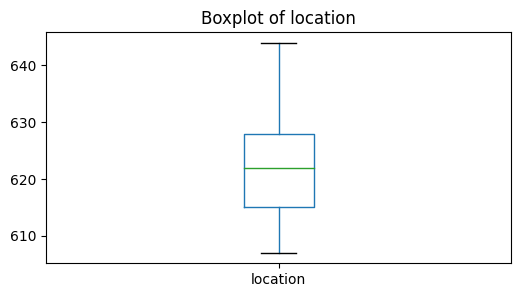

In [221]:
def plot_boxplot(df, ft, figsize=(6, 3)):
    plt.figure(figsize=figsize)
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.title(f"Boxplot of {ft}")
    plt.show()

plot_boxplot(data, "location", figsize=(6, 3))

In [222]:
data.shape

(2285, 5)

In [223]:
data.head()

,name,year,month,weather changes,location
0,agboo,2023.0,january,northeast-monsoon,614.0
1,agboo,2023.0,february,northeast-monsoon,615.0
2,agboo,2023.0,march,first inter-monsoon,616.0
3,agboo,2023.0,april,first inter-monsoon,615.0
4,agboo,2023.0,may,southwest-monsoon,612.0


In [224]:
data = pd.get_dummies(data, columns=['name', 'month', 'weather changes'])

In [225]:
data.head()

,year,location,name_agboo,name_asala1,name_asala2,name_banu,name_barana,name_chandi,name_deega1,name_deega2,...,month_june,month_march,month_may,month_november,month_october,month_september,weather changes_first inter-monsoon,weather changes_northeast-monsoon,weather changes_second inter-monsoon,weather changes_southwest-monsoon
0,2023.0,614.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023.0,615.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2023.0,616.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2023.0,615.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2023.0,612.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [226]:
!pip install sklearn

In [227]:
X = data.drop('location', axis=1)
y = data['location']

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [231]:
X_train.shape, X_test.shape

((1599, 32), (686, 32))

In [233]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [234]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.5173914844536149
DecisionTreeRegressor() --> 0.9491679708709956
RandomForestRegressor() --> 0.9826733191734006


In [235]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.9833405470471749

In [236]:
import pickle
with open('Elephant_Location.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [237]:
X_test.columns

Index(['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon'],
      dtype='object')

In [238]:
best_model.predict([[2013,   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([625.3])

In [239]:
# Define the column names
column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

# Create a DataFrame with your prediction input and column names
prediction_data = pd.DataFrame([[2013,   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0]], columns=column_names)

# Use your model to make a prediction
prediction = best_model.predict(prediction_data)

# Convert the prediction to an integer
rounded_prediction = int(prediction)

# Debugging print to check the rounded prediction
print("Grama Niladhari Division:", rounded_prediction)


Grama Niladhari Division: 625


In [240]:
location_mapping = {
    605: 'Nawakkulama',
    606: 'Moragoda',
    607: 'Keeriyagaswewa',
    608: 'Mahadivulwewa',
    609: 'Heenukkiriyawa',
    610: 'Ganewalpola',
    611: 'Mainiya Rambewa',
    612: 'Kollankuttigama',
    613: 'Maminiyawa',
    614: 'Thoruwewa',
    615: 'Kele Puliyankulama',
    616: 'Ihala Puliyankulama',
    617: 'Maradankadawala',
    618: 'Olukaranda',
    619: 'Mudaperumagama',
    620: 'Dumriya Nagaraya',
    621: 'Ihalagama',
    622: 'Shasthrawelliya',
    623: 'Karukkankulama',
    624: 'Mailagaswewa',
    625: 'Neekiniyawa',
    626: 'Malawa',
    627: 'Maradankadawala Road',
    628: 'Kekirawa Town',
    629: 'Kuda Kekirawa',
    630: 'Mankadawala',
    631: 'Maldenipura',
    632: 'Embulgaswewa',
    633: 'Medawewa',
    634: 'Pothanegama',
    635: 'Kumbukwewa',
    636: 'Rathmalkanda',
    637: 'Maha Kekirawa',
    638: 'Olombewa',
    639: 'Korasagalla',
    640: 'Medagama',
    641: 'Maha Elagamuwa',
    642: 'Pallehingura',
    643: 'Unagollewa',
    644: 'Horapola',
    645: 'Nidigama',
    646: 'Barawila',
    647: 'Murungahitikanda',
    648: 'Kotagala',
    649: 'Nelbegama',
    650: 'Madatugama',
    651: 'Kandalama East',
    652: 'Kithulhitiyawa',
    653: 'Kandalama West',
    654: 'Dunumandalawa',
    655: 'Bandarapothana',
    656: 'Undurawa',
    657: 'Dambewatana'
}

column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

prediction_data = pd.DataFrame([[2013,  0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0]], columns=column_names)

prediction = best_model.predict(prediction_data)

rounded_prediction = int(prediction)

predicted_location_name = location_mapping.get(rounded_prediction, 'Unknown')

print("Elephant Located Area:", predicted_location_name)


Elephant Located Area: Neekiniyawa


In [241]:
import pickle

# Load the trained model
with open('Elephant_Location.pickle', 'rb') as file:
    best_model = pickle.load(file)

# Define the column names
column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

# Create a DataFrame with your prediction input
prediction_data = pd.DataFrame([[2013,    0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     1, 0, 0, 0]], columns=column_names)

# Use your model to make a prediction
prediction = best_model.predict(prediction_data)

# Convert the prediction to an integer
rounded_prediction = int(prediction)

# Debugging print to check the rounded prediction
print("Grama Niladhari Division:", rounded_prediction)

# Define a mapping of location codes to location names
location_mapping = {
    605: 'Nawakkulama',
    606: 'Moragoda',
    607: 'Keeriyagaswewa',
    608: 'Mahadivulwewa',
    609: 'Heenukkiriyawa',
    610: 'Ganewalpola',
    611: 'Mainiya Rambewa',
    612: 'Kollankuttigama',
    613: 'Maminiyawa',
    614: 'Thoruwewa',
    615: 'Kele Puliyankulama',
    616: 'Ihala Puliyankulama',
    617: 'Maradankadawala',
    618: 'Olukaranda',
    619: 'Mudaperumagama',
    620: 'Dumriya Nagaraya',
    621: 'Ihalagama',
    622: 'Shasthrawelliya',
    623: 'Karukkankulama',
    624: 'Mailagaswewa',
    625: 'Neekiniyawa',
    626: 'Malawa',
    627: 'Maradankadawala Road',
    628: 'Kekirawa Town',
    629: 'Kuda Kekirawa',
    630: 'Mankadawala',
    631: 'Maldenipura',
    632: 'Embulgaswewa',
    633: 'Medawewa',
    634: 'Pothanegama',
    635: 'Kumbukwewa',
    636: 'Rathmalkanda',
    637: 'Maha Kekirawa',
    638: 'Olombewa',
    639: 'Korasagalla',
    640: 'Medagama',
    641: 'Maha Elagamuwa',
    642: 'Pallehingura',
    643: 'Unagollewa',
    644: 'Horapola',
    645: 'Nidigama',
    646: 'Barawila',
    647: 'Murungahitikanda',
    648: 'Kotagala',
    649: 'Nelbegama',
    650: 'Madatugama',
    651: 'Kandalama East',
    652: 'Kithulhitiyawa',
    653: 'Kandalama West',
    654: 'Dunumandalawa',
    655: 'Bandarapothana',
    656: 'Undurawa',
    657: 'Dambewatana'
}

# Get the predicted location name
predicted_location_name = location_mapping.get(rounded_prediction, 'Unknown')

print("Elephant Located Area:", predicted_location_name)


Grama Niladhari Division: 625
Elephant Located Area: Neekiniyawa


In [242]:
import pickle
import pandas as pd

# Load the trained model
with open('Elephant_Location.pickle', 'rb') as file:
    best_model = pickle.load(file)

# Define the column names
column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

# Create an empty DataFrame for user input
user_input = pd.DataFrame(columns=column_names)

# Function to get user input and make predictions
def get_user_input():
    print("Enter feature values for prediction:")
    for column in column_names:
        value = input(f"{column}: ")
        user_input.at[0, column] = float(value)  # Assuming all values are numeric
    return user_input

# Function to make predictions
def make_prediction(model, input_data):
    prediction = model.predict(input_data)
    rounded_prediction = int(prediction)
    return rounded_prediction

# Function to map location codes to location names
def get_location_name(location_code):
    location_mapping = {
          606: 'Moragoda',
          607: 'Keeriyagaswewa',
          608: 'Mahadivulwewa',
          609: 'Heenukkiriyawa',
          610: 'Ganewalpola',
          611: 'Mainiya Rambewa',
          612: 'Kollankuttigama',
          613: 'Maminiyawa',
          614: 'Thoruwewa',
          615: 'Kele Puliyankulama',
          616: 'Ihala Puliyankulama',
          617: 'Maradankadawala',
          618: 'Olukaranda',
          619: 'Mudaperumagama',
          620: 'Dumriya Nagaraya',
          621: 'Ihalagama',
          622: 'Shasthrawelliya',
          623: 'Karukkankulama',
          624: 'Mailagaswewa',
          625: 'Neekiniyawa',
          626: 'Malawa',
          627: 'Maradankadawala Road',
          628: 'Kekirawa Town',
          629: 'Kuda Kekirawa',
          630: 'Mankadawala',
          631: 'Maldenipura',
          632: 'Embulgaswewa',
          633: 'Medawewa',
          634: 'Pothanegama',
          635: 'Kumbukwewa',
          636: 'Rathmalkanda',
          637: 'Maha Kekirawa',
          638: 'Olombewa',
          639: 'Korasagalla',
          640: 'Medagama',
          641: 'Maha Elagamuwa',
          642: 'Pallehingura',
          643: 'Unagollewa',
          644: 'Horapola',
          645: 'Nidigama',
          646: 'Barawila',
          647: 'Murungahitikanda',
          648: 'Kotagala',
          649: 'Nelbegama',
          650: 'Madatugama',
          651: 'Kandalama East',
          652: 'Kithulhitiyawa',
          653: 'Kandalama West',
          654: 'Dunumandalawa',
          655: 'Bandarapothana',
          656: 'Undurawa',
          657: 'Dambewatana'
        # Add other location mappings here
    }
    return location_mapping.get(location_code, 'Unknown')

# Main loop for testing
while True:
    user_input = get_user_input()
    prediction = make_prediction(best_model, user_input)
    location_name = get_location_name(prediction)
    rounded_prediction = int(prediction)
    print("Grama Niladhari Division:", rounded_prediction)
    print(f"Predicted Location: {location_name}")
    continue_testing = input("Do you want to continue testing? (yes/no): ").lower()
    if continue_testing != 'yes':
        break


Enter feature values for prediction:
year: 2023
name_agboo: 1
name_asala1: 0
name_asala2: 0
name_banu: 0
name_barana: 0
name_chandi: 0
name_deega1: 0
name_deega2: 0
name_gamunu: 0
name_kawantissa: 0
name_mahasen: 0
name_neela: 0
name_rewatha: 0
name_sumedha: 0
name_unicorn: 0
month_april: 0
month_august: 0
month_december: 0
month_february: 0
month_january: 1
month_july: 0
month_june: 0
month_march: 0
month_may: 0
month_november: 0
month_october: 0
month_september: 0
weather changes_first inter-monsoon: 0
weather changes_northeast-monsoon: 1
weather changes_second inter-monsoon: 0
weather changes_southwest-monsoon: 0
Grama Niladhari Division: 613
Predicted Location: Maminiyawa
Do you want to continue testing? (yes/no): no
